<a href="https://colab.research.google.com/github/vishalgimhan/MachineLearning-Learn/blob/main/II_Artificial_Intelligence_Foundations_Machine_Learning_LinkedIn_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Variables
* longitude: A measure of how far west a house is (a higher value is farther west)
* latitude: A measure of how far north a house is (a higher value is farther north)
* housingMedianAge: Median age of a house within a block (a lower number is a newer building)
* totalRooms: Total number of rooms within a block
* totalBedrooms: Total number of bedrooms within a block
* population: Total number of people residing within a block
* households: Total number of households, a group of people residing within a home unit, for a block
* medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
* oceanProximity: Location of the house in proximity to the ocean

Target Variable
* medianHouseValue: Median house value for households within a block (measured in US Dollars)

# Obtain & Load

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Read the data into a Pandas DataFrame
housing_df = pd.read_csv('https://raw.githubusercontent.com/vishalgimhan/MachineLearning-Learn/refs/heads/main/data/housing.csv')

housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Show th features along with count and datatype
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Visualize to understand the relationship with the Target

In [4]:
# Choose the numeric features
# housing_df_num = housing_df.select_dtypes(float)
# housing_df_num2 = housing_df.select_dtypes(include=[np.number])
# housing_df_num.columns

Text(0.5, 0, 'House Values')

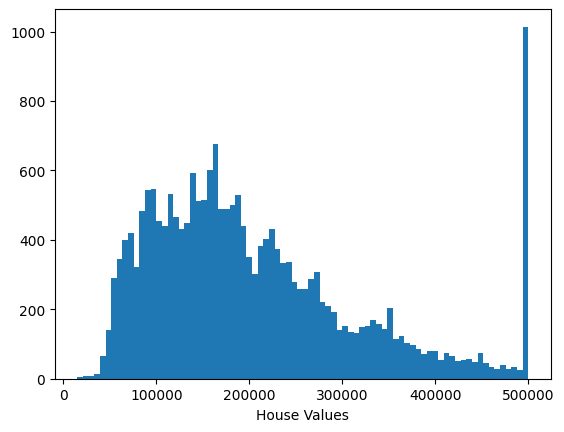

In [5]:
# Plot the distribution of target variable (median_house_value) using histogram

# bin -> no of coumns
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House Values")

* Values are normally distributed with few outliers
* Most houses are in range 100k to 200k

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

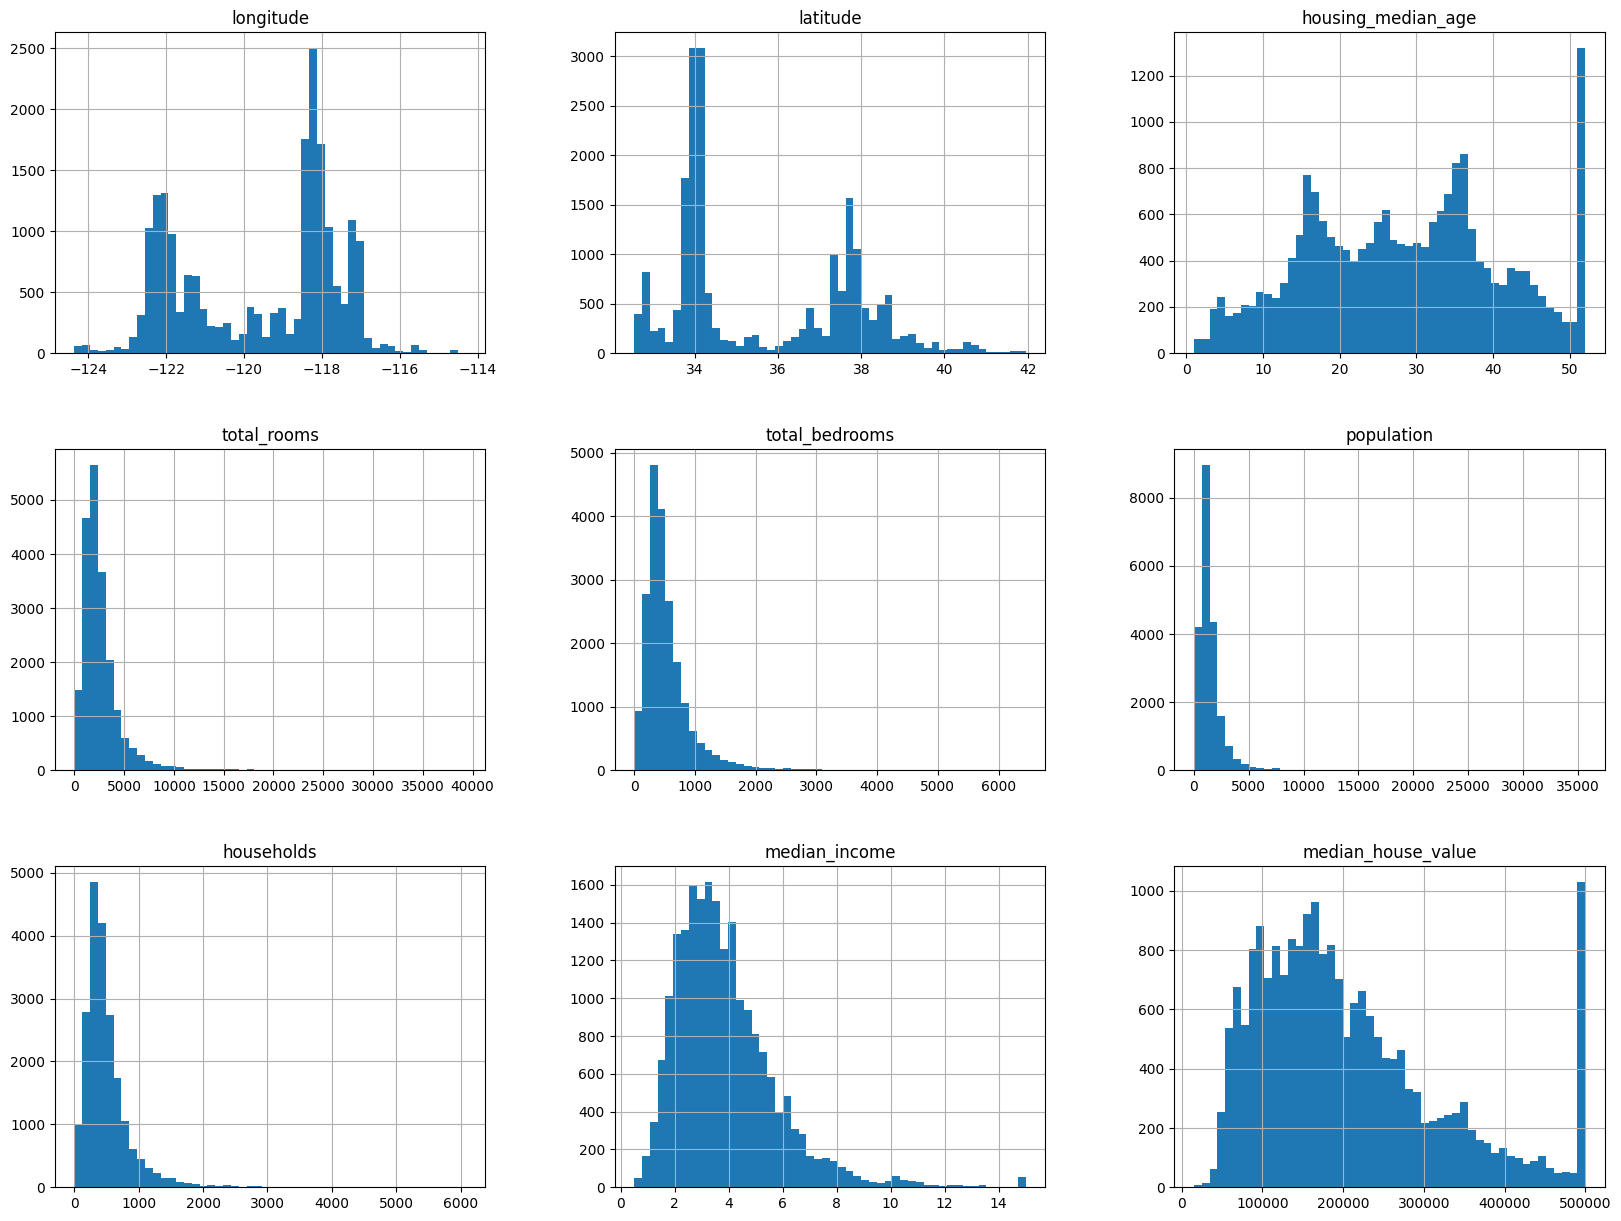

In [6]:
# Plot histograms to all the features
housing_df.hist(bins=50, figsize=(20, 15))

* outliers in housing_median_age, median_house_value
* several peaks

In [7]:
# Using Heatmaps to identify Correlation

corr = housing_df.corr(numeric_only=True)
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

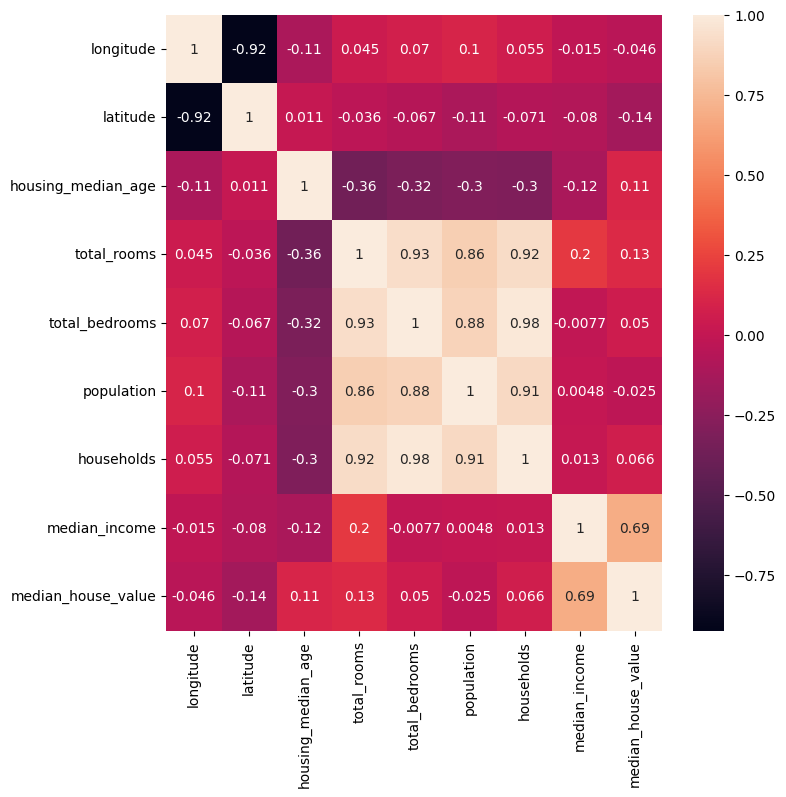

In [8]:
# Make a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)
plt.show()

* Highly Correlated, means teach the model the same thing
* Closer to zero - Low correlation
* Dimensionality Reduction - Remove features with high correlation

# Prepare & Process the data

Understanding missing data that could skew the model

In [9]:
# Features with missing valies
housing_df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [10]:
housing_df.shape

(20640, 10)

In [11]:
# Calculate the % of missing values
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0] * 100

1.002906976744186

 Dealing Missing values:
 * Delete them
 * Use ML tp predict them
 * Replace with mean
 * Use ML Algorithms that handle them well

In [12]:
 # Dealing Missing values using imputation

 # create a temporary copy
 housing_df_temp = housing_df.copy()

 # Retrieve list with numerical data - excluding ocean_proximity
 numerical_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']

 # Extract columns with at least one missing value
 missing_num_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]

# Update temp datafram with numerical columns that have empty values
housing_df_temp = housing_df_temp[missing_num_list]

In [13]:
# Impute using Machine learning
from sklearn.impute import KNNImputer

#initialize the KNNImputer
knn = KNNImputer(n_neighbors=3)

# Train the model
knn.fit(housing_df_temp)

# Transform the data
housing_df_temp_filled = knn.transform(housing_df_temp)


# Convert the resulting numpy array to Pandas DataFrame
housing_df_temp_filled = pd.DataFrame(housing_df_temp_filled, columns=housing_df_temp.columns)

In [14]:
housing_df_temp_filled.isnull().any()

,0
total_bedrooms,False


In [15]:
housing_df['total_bedrooms'] = housing_df_temp_filled['total_bedrooms']

# Feature Engineering

Create new features using correlated features

In [16]:
# Ratio of total rooms to total household
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']

# Ratio of total bedrooms to total rooms
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']

# Ratio of population to households
housing_df['population_per_household'] = housing_df['population']/housing_df['households']

# Coordinate latitude and longitude
housing_df['coords'] = housing_df['latitude']/housing_df['longitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

Several features (total_rooms,total_bedrooms,population,households) have very high correlation to one another

In [17]:
housing_df = housing_df.drop(['total_rooms', 'households', 'total_bedrooms', 'population', 'longitude', 'latitude'], axis=1)

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


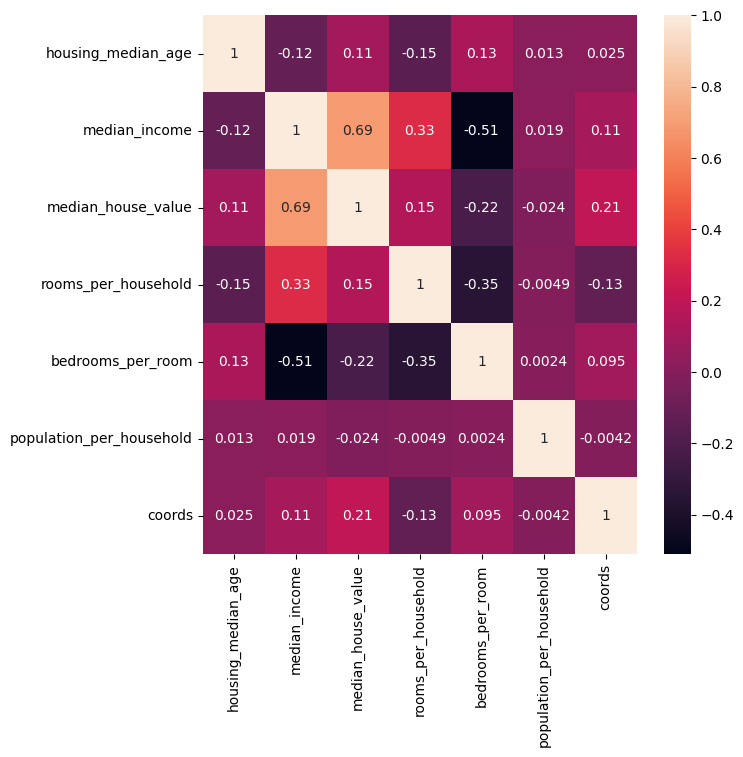

In [18]:
# HEatmap after removing correlation

corr = housing_df.corr(numeric_only=True)

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True)
plt.show()

Encode Categorical Data - Most ML Algorithms can only learn from numeric data

In [19]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [20]:
# Check the unique categories for OCEAN_PROXIMITY
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [21]:
# get a count
housing_df.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


One-Hot Encoding


In [22]:
# Using Pandas get_dummies function
print(pd.get_dummies(housing_df['ocean_proximity']).astype(int)) #if not astype(int), got Ture & False instead of 1 & 0

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20640 rows x 5 columns]


In [23]:
# Perform it on the original dataset
housing_df_encoded = pd.get_dummies(data=housing_df, columns=['ocean_proximity'])
housing_df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-0.309908,False,False,False,True,False
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-0.309769,False,False,False,True,False
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-0.309637,False,False,False,True,False
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-0.309611,False,False,False,True,False
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-0.309611,False,False,False,True,False


In [24]:
# Convert the boolean columns to Numeric
boolean_columns = [col for col in housing_df_encoded.columns if housing_df_encoded[col].dtype == 'bool']
housing_df_encoded[boolean_columns] = housing_df_encoded[boolean_columns].astype(int)
housing_df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-0.309908,0,0,0,1,0
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-0.309769,0,0,0,1,0
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-0.309637,0,0,0,1,0
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-0.309611,0,0,0,1,0
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-0.309611,0,0,0,1,0


# Train the Model

In [25]:
# Adjust the column names
housing_df_encoded.columns = [col.lower().replace(' ', '_').replace('<', ' ') for col in housing_df_encoded.columns]

housing_df_encoded.columns

Index(['housing_median_age', 'median_income', 'median_house_value',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household',
       'coords', 'ocean_proximity_ 1h_ocean', 'ocean_proximity_inland',
       'ocean_proximity_island', 'ocean_proximity_near_bay',
       'ocean_proximity_near_ocean'],
      dtype='object')

In [26]:
# Split into Target and Features
X = housing_df_encoded[['housing_median_age', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household',
       'coords', 'ocean_proximity_ 1h_ocean', 'ocean_proximity_inland',
       'ocean_proximity_island', 'ocean_proximity_near_bay',
       'ocean_proximity_near_ocean']]
y = housing_df_encoded['median_house_value']

Split the dataset imto train & test

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14448, 11) (14448,)
(6192, 11) (6192,)


# Linear Regression

In [28]:
# Model Training
from sklearn.linear_model import LinearRegression

# Initiate the model
reg_model = LinearRegression()

# Train the model
reg_model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Run the Predictions
y_pred_test = reg_model.predict(X_test)
y_pred_test

array([104701.54358203,  91076.54340086, 215617.10558497, ...,
       215608.78682748, 125601.62488418, 201381.94529807])

# Evaluate the Model

In [30]:
# Compare the actual and the values predicted by the model
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
pred_test_df.head()

,Actual,Predicted
20046,47700.0,104701.543582
3024,45800.0,91076.543401
15663,500001.0,215617.105585
20484,218600.0,283446.164192
9814,278000.0,244707.229206


In [31]:
# Evaluate the model using R2 metric
#1 means perfect, 0 means poor

r2_reg_model_test = reg_model.score(X_test, y_test)
print("R^2 Test: {}".format(round(r2_reg_model_test,2)))

R^2 Test: 0.55


In [32]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_test)

0.554142540862744

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Initiate the model
rf_model = RandomForestRegressor(n_estimators=10, random_state=10)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

In [34]:
# Run the predictions
y_rf_pred_test = rf_model.predict(X_test)

# Evaluate the Model

In [35]:
rf_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred_test})

rf_pred_test_df.head()

,Actual,Predicted
20046,47700.0,51000.0
3024,45800.0,96100.0
15663,500001.0,441560.3
20484,218600.0,259550.0
9814,278000.0,247200.0


In [36]:
# Determine the accuracy with R2
from sklearn.metrics import r2_score

rf_score = r2_score(y_test, y_rf_pred_test)
print("R^2 Test: {}%".format(round(rf_score,2)*100))

R^2 Test: 76.0%


Better than the Linear Regression model

# XGBoost

EXtreme Gradient Boosting

In [37]:
from xgboost import XGBRegressor

# INitiate the model
xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
# Run the Predictions
y_xgb_pred_test = xgb_model.predict(X_test)

# Evaluate the Model

In [39]:
# Compare actual and predicted values
xgb_pred_test_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_xgb_pred_test})
xgb_pred_test_df.head()

,Actual,Predicted
20046,47700.0,33976.253906
3024,45800.0,76660.593750
15663,500001.0,461627.781250
20484,218600.0,263570.812500
9814,278000.0,217879.265625


In [40]:
xgb_score = r2_score(y_test, y_xgb_pred_test)
print("R^2 Test: {}%".format(round(xgb_score, 2)*100))

R^2 Test: 77.0%


# Hyperparameter Tuning

In [41]:
# Determine the hyperparameters available for tuning
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

* n_estimators -> no of trees in ensember, often increased untill no further improvement
* max_depth -> Maximum depth of each tree, often between 1 and 10
* learning_rate -> weigh for each model, often set smaller like 0.1, 0.01, etc
* subsample -> number of observations used in each tree, between 0 and 1, 1 means include all observations
* colsample_bytree -> columns/variables used in each tree, between 0 and 1, 1 means include all features

In [42]:
# New tuned model
xgb_model_2 = XGBRegressor(
    gamma = 0.05,
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1,
    verbosity=1)

xgb_model_2.fit(X_train, y_train)

#run the predictions
y_xgb_2_pred_test = xgb_model_2.predict(X_test)

In [43]:
# Comapre the actual & Predicted
xgb_2_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_2_pred_test})
xgb_2_pred_test_df.head()

,Actual,Predicted
20046,47700.0,57439.996094
3024,45800.0,83372.437500
15663,500001.0,415149.468750
20484,218600.0,255466.578125
9814,278000.0,244938.593750


In [44]:
# Check the R^2 accuracy
r2_xgb_model2 = xgb_model_2.score(X_test, y_test)
print("R^2 Test: {}%".format(round(r2_xgb_model2,2)*100))

R^2 Test: 79.0%
